In [10]:
time=pd.Timestamp.now().isoformat()
time

'2025-07-17T01:25:14.521709'

# **Handwritten Digit Recognition using Support Vector Machine (SVM)**
## About the Project
In this project, I worked with a dataset of 1,797 images of handwritten digits from the popular sklearn.datasets.load_digits library. Each image is an 8x8 grayscale representation of a single digit (0–9). The aim of the project was to build a machine learning model capable of accurately classifying these digits based on pixel-level features using the Support Vector Machine (SVM) algorithm.
## **Goal:**
To build a robust and accurate image classification model using Support Vector Machine that can recognize handwritten digits and evaluate its performance using appropriate metrics.
## **Dataset Details:**
The dataset contains the following attributes:
Source: load_digits() from sklearn.datasets
Type: Grayscale image data
Shape: 8x8 pixel images (64 features per sample)
Total Samples: 1,797 images
Target Variable: Digit labels from 0 to 9
Each record corresponds to an image that has been flattened into a 64-length feature vector, where each value represents pixel intensity.
## **Methodologies:**
- Data Preparation:
The digit images were loaded and converted into a format suitable for machine learning models, with pixel intensities as features and the digit class as the label.
- Data Cleaning and Preprocessing:
Checked for null or missing values to ensure data integrity.
Flattened the 8x8 image into a 1D feature vector of 64 features.
Normalized features implicitly using SVM’s kernel scaling.
Data was split into training and testing sets using train_test_split() for evaluation.
- Exploratory Data Analysis (EDA):
Sample digit images were visualized using Matplotlib to understand the structure and distribution of pixel values.
Distribution of digit classes was checked to ensure a balanced dataset.
Sample predictions were visualized alongside their actual values to assess model correctness visually.
- Modeling:
Implemented the Support Vector Machine classifier from sklearn.svm.SVC.
Trained the SVM model on 70% of the dataset and tested on the remaining 30%.
The model was trained to identify digits from 0 to 9 based on pixel intensity patterns.
Used the default kernel (RBF) for classification.
## **Evaluation:**
The performance of the model was assessed using the following evaluation metrics:
- Confusion Matrix: To analyze correct vs. incorrect classifications per digit class.
- Classification Report: Including precision, recall, and F1-score for all 10 digit classes.
- Visual Inspection: Model predictions were plotted alongside actual digits to validate the predictions intuitively.
## **Skills Developed:**
- Understanding of image classification using machine learning.
- Gained experience in preprocessing image data and converting it for ML use.
- Learned practical use of the SVM algorithm for multiclass classification problems.
- Proficient use of Python libraries such as sklearn, matplotlib, and seaborn.
- Gained the ability to evaluate model performance using classification metrics and visualization tools.

### **Model Development**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
dataset = load_digits()

In [3]:
print(dataset.data)
print(dataset.target)
print(dataset.data.shape)
print(dataset.images.shape)
dataimageLength = len(dataset.images)
print(dataimageLength)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797, 8, 8)
1797


<Figure size 640x480 with 0 Axes>

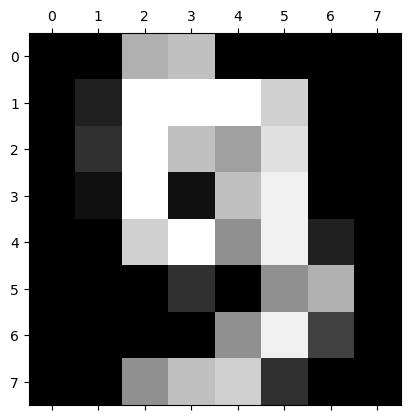

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

In [4]:
n=9 #No. of Sample out of Samples total 1797
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[n])
plt.show()
dataset.images[n]

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*
### *Input - Pixel | Output - Class*

In [5]:
X = dataset.images.reshape((dataimageLength,-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
Y = dataset.target
Y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
# Features and labels
x = dataset.data
y = dataset.target

### *Splitting Dataset into Train & Test*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)

### *Training*

In [12]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

### *Predicting, what the digit is from Test Data*

[3]




C:\Users\nicho\AppData\Local\Temp\ipykernel_11168\3294056200.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('%i' %result)


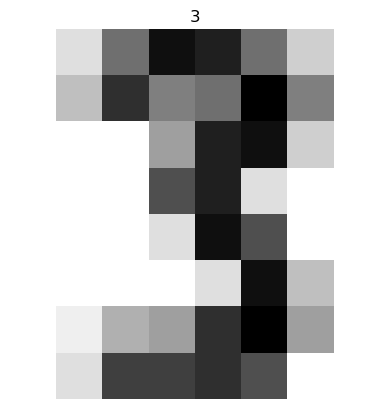

In [14]:
n=13
result = model.predict(dataset.images[n].reshape((1,-1)))
plt.imshow(dataset.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
print(result)
print("\n")
plt.axis('off')
plt.title('%i' %result)
plt.show()

### *Prediction for Test Data*

In [15]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6 6]
 [9 9]
 [3 3]
 [7 7]
 [2 2]
 [1 1]
 [5 5]
 [2 2]
 [5 5]
 [2 2]
 [1 1]
 [9 9]
 [4 4]
 [0 0]
 [4 4]
 [2 2]
 [3 3]
 [7 7]
 [8 8]
 [8 8]
 [4 4]
 [3 3]
 [9 9]
 [7 7]
 [5 5]
 [6 6]
 [3 3]
 [5 5]
 [6 6]
 [3 3]
 [4 4]
 [9 9]
 [1 1]
 [4 4]
 [4 4]
 [6 6]
 [9 9]
 [4 4]
 [7 7]
 [6 6]
 [6 6]
 [9 9]
 [1 1]
 [3 3]
 [6 6]
 [1 1]
 [3 3]
 [0 0]
 [6 6]
 [5 5]
 [5 5]
 [1 1]
 [3 9]
 [5 5]
 [6 6]
 [0 0]
 [9 9]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [4 4]
 [5 5]
 [2 2]
 [4 4]
 [5 5]
 [7 7]
 [0 0]
 [7 7]
 [5 5]
 [9 9]
 [5 5]
 [5 5]
 [4 4]
 [7 7]
 [0 0]
 [4 4]
 [5 5]
 [5 5]
 [9 9]
 [9 9]
 [0 0]
 [2 2]
 [3 3]
 [8 8]
 [0 0]
 [6 6]
 [4 4]
 [4 4]
 [9 9]
 [1 1]
 [2 2]
 [8 8]
 [3 3]
 [5 5]
 [2 2]
 [9 9]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [3 3]
 [5 5]
 [3 3]
 [1 1]
 [3 3]
 [5 5]
 [9 9]
 [4 4]
 [2 2]
 [7 7]
 [7 7]
 [4 4]
 [4 4]
 [1 1]
 [9 9]
 [2 2]
 [7 7]
 [8 8]
 [7 7]
 [2 2]
 [6 6]
 [9 9]
 [4 4]
 [0 0]
 [7 7]
 [2 2]
 [7 7]
 [5 5]
 [8 8]
 [7 7]
 [5 5]
 [7 7]
 [9 7]
 [0 0]
 [6 6]
 [6 6]
 [4 4]
 [2 2]
 [8 8]
 [0 0]
 [9 9]
 [4 4]

### *Evaluate Model - Accuracy Score*

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 98.22222222222223%


### *Play with the Different Method*

In [20]:
from sklearn import svm
model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.001,C=0.1)
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
y_predModel1 = model1.predict(X_test)
y_predModel2 = model2.predict(X_test)
y_predModel3 = model3.predict(X_test)
y_predModel4 = model4.predict(X_test)
print("Accuracy of the Model 1: {0}%".format(accuracy_score(y_test, y_predModel1)*100))
print("Accuracy of the Model 2: {0}%".format(accuracy_score(y_test, y_predModel2)*100))
print("Accuracy of the Model 3: {0}%".format(accuracy_score(y_test, y_predModel3)*100))
print("Accuracy of the Model 4: {0}%".format(accuracy_score(y_test, y_predModel4)*100))

Accuracy of the Model 1: 98.22222222222223%
Accuracy of the Model 2: 98.66666666666667%
Accuracy of the Model 3: 98.88888888888889%
Accuracy of the Model 4: 96.44444444444444%


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



#### **2. Confusion Matrix**

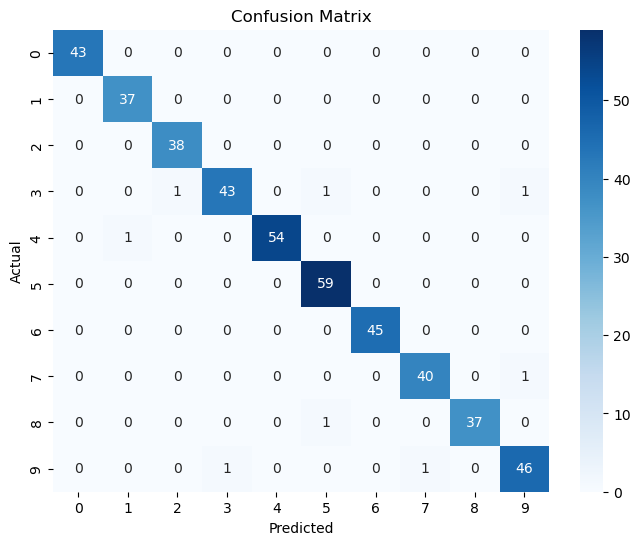

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.target_names, yticklabels=dataset.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### **Conclusion**
The SVM model successfully classified handwritten digits with high accuracy. It shows that SVM is an effective method for image classification tasks, particularly when combined with a well-preprocessed dataset.